In [2]:
!pip install numpy
!pip install cplex
!pip install qiskit-optimization

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


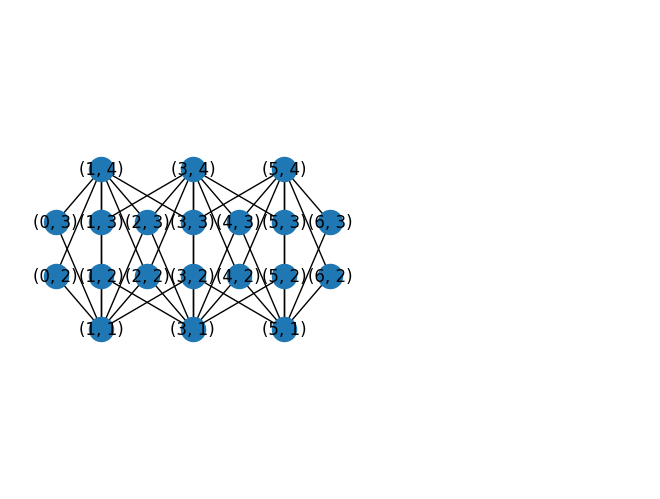

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover


for i in range(1, 6, 2):
    point = (i, 1)
    points1.append(point)

for i in range(1, 6, 2):
    point = (i, 4)
    points2.append(point)

for i in range(0, 7):
    for j in range(2, 4):
        point = (i, j)
        points3.append(point)

G.add_nodes_from(points1 + points2 + points3)


#edge that represents scope between lidar placement and vertices to cover
for node1 in points1:
  for j in range (node1[1]+1, node1[1]+3):
    if(j==node1[1]+1):
      for i in range(node1[0]-2, node1[0]+3):
        if (i,j) in points3:
          G.add_edge(tuple(node1), (i,j))
    if(j== node1[1]+2):
      for i in range(node1[0]-1, node1[0]+2):
        if (i,j) in points3:
          G.add_edge(tuple(node1), (i,j))
for node2 in points2:
  for j in range (node2[1]-2,node2[1]):
    if(j== node2[1]-2):
      for i in range(node2[0]-1, node2[0]+2):
        if (i,j) in points3:
          G.add_edge(tuple(node2), (i,j))
    if(j==node2[1]-1):
      for i in range(node2[0]-2, node2[0]+3):
        if (i,j) in points3:
          G.add_edge(tuple(node2), (i,j))
    

#Draw the graph

pos = {node: node for node in G.nodes()} 
nx.draw(G, pos,with_labels=True)

plt.xlim(-1, 13)
plt.ylim(-2, 7)

plt.xticks(range(0, 13))
plt.yticks(range(1, 7))

plt.show()

def showGraph(S):

    G = nx.Graph()


#     points1 = [] #placement of lidars for one side
#     points2 = [] #placement of lidars for other side
#     points3 = [] #vertices to cover


    for i in range(1, 6, 2):
        point = (i, 1)
        points1.append(point)

    for i in range(1, 6, 2):
        point = (i, 4)
        points2.append(point)

    for i in range(0, 7):
        for j in range(2, 4):
            point = (i, j)
            points3.append(point)

    G.add_nodes_from(points1 + points2 + points3)


    #edge that represents scope between lidar placement and vertices to cover
    for node1 in points1:
      for j in range (node1[1]+1, node1[1]+3):
        if(j==node1[1]+1):
          for i in range(node1[0]-2, node1[0]+3):
            if (i,j) in points3:
              G.add_edge(tuple(node1), (i,j))
        if(j== node1[1]+2):
          for i in range(node1[0]-1, node1[0]+2):
            if (i,j) in points3:
              G.add_edge(tuple(node1), (i,j))
    for node2 in points2:
      for j in range (node2[1]-2,node2[1]):
        if(j== node2[1]-2):
          for i in range(node2[0]-1, node2[0]+2):
            if (i,j) in points3:
              G.add_edge(tuple(node2), (i,j))
        if(j==node2[1]-1):
          for i in range(node2[0]-2, node2[0]+3):
            if (i,j) in points3:
              G.add_edge(tuple(node2), (i,j))


    #Draw the graph

    pos = {node: node for node in G.nodes()} 
    nx.draw(G, pos, with_labels=True)
    actE =[]
    for node in S:
      for edge in G.edges(node):
        actE.append(edge)
    # Draw the graph
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True)

    #plt.xlim(-2, 13)
    #plt.ylim(-2, 7)

    #plt.xticks(range(1, 13))
    #plt.yticks(range(1, 7))
    nx.draw_networkx_nodes(G, pos, S, node_color='red')
    nx.draw_networkx_edges(G, pos, actE, edge_color='red')
    plt.show()
#showGraph(S)

In [4]:
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx
import re

# $x = O(V_1)$ $y = O(E)$

objective: 2
status: OPTIMAL_SOLUTION(2)
  "x_1_1"=1
  "x_5_4"=1
  "y_(1, 1)_(0, 2)"=1
  "y_(1, 1)_(1, 2)"=1
  "y_(1, 1)_(2, 2)"=1
  "y_(1, 1)_(3, 2)"=1
  "y_(1, 1)_(0, 3)"=1
  "y_(1, 1)_(1, 3)"=1
  "y_(1, 1)_(2, 3)"=1
  "y_(5, 4)_(4, 2)"=1
  "y_(5, 4)_(5, 2)"=1
  "y_(5, 4)_(6, 2)"=1
  "y_(5, 4)_(3, 3)"=1
  "y_(5, 4)_(4, 3)"=1
  "y_(5, 4)_(5, 3)"=1
  "y_(5, 4)_(6, 3)"=1


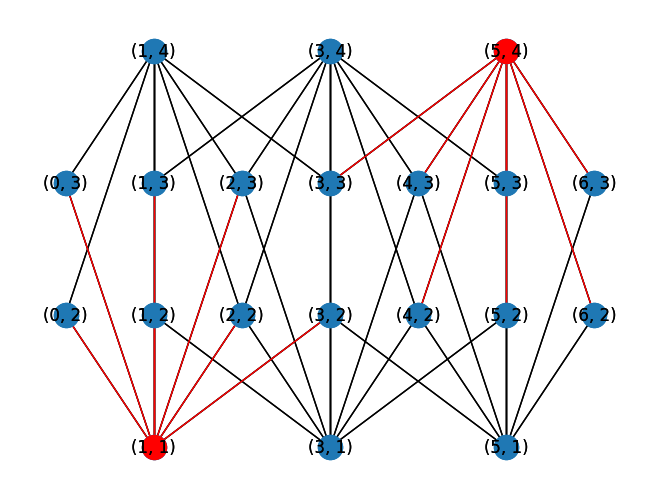

In [5]:
tabR = []
m = Model(name='BMW')
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'
#z = m.integer_var_dict(G.nodes(degree), name='z')
y = m.binary_var_dict(G.edges, name='y')
#constraint on edge covering all vertices (allows to ensure that at least one lidar covers the area)
for node in points3:
  degree = len(G.edges(node))
  adjEdges = [(i[1], i[0]) for i in G.edges(node)]
  m.add_constraint(sum(y[i] for i in adjEdges) <= degree)
  m.add_constraint(sum(y[i] for i in adjEdges) >= 1)

#Link the relation between edge activation and lidar placement activation

for node in pointsL:
  m.add_constraint(sum(y[i] - x[node] for i in G.edges(node) if i[0] == node) == 0)

#print(m.prettyprint())
output = m.pprint_as_string()
values = re.findall(r'\[(.*?)\]', output)
valueT = 0
for value in values:
    #print(value)
    valueT = int(value)+valueT
tabR.append(valueT)

m.export_as_lp(basename="BMW1", path=os.path.abspath(""))
sol_model = m.solve()
m.print_solution()
S = []
for (x, y) in sol_model.iter_var_values():
  sx = str(x)
  if sx[0] == 'x':
    S.append((int(sx[2]), int(sx[4])))
showGraph(S)
#dvar bool x[6];
#dvar bool y[44];

# $x = O(V_1)$ $y = O(V_2)$ $s = O(deg(V_2))$

8
objective: 4
status: OPTIMAL_SOLUTION(2)
  x_5_1=1
  x_1_4=1
  y_0_2=1
  y_0_3=1
  y_1_2=1
  y_1_3=1
  y_2_2=1
  y_2_3=1
  y_3_2=1
  y_3_3=1
  y_4_2=1
  y_4_3=1
  y_5_2=1
  y_5_3=1
  y_6_2=1
  y_6_3=1


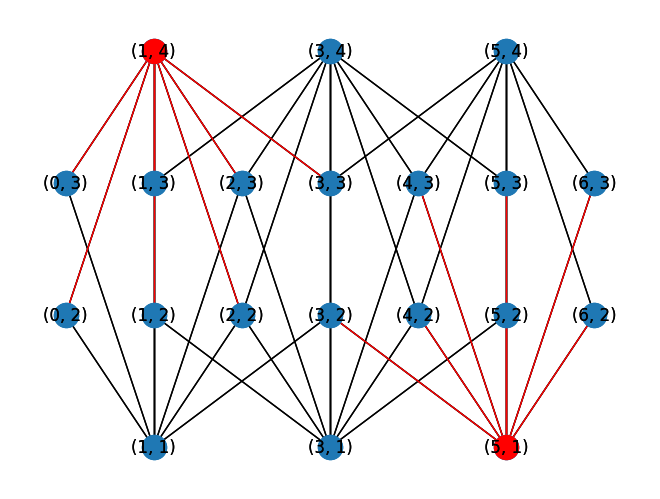

In [6]:
m = Model(name='BMW')
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'

max_deg = 0

for v in G.nodes():
    v_deg = G.degree[v]
    if max_deg <= v_deg:
        max_deg = v_deg

print(max_deg)

y = m.integer_var_dict(points3, name='y',lb=0, ub=max_deg)

#constraint on edge covering all vertices (allows to ensure that at least one lidar covers the area)
for node in points3:
    m.add_constraint(y[node] <= G.degree[node])
    m.add_constraint(y[node] >= 1)

#Link the relation between edge activation and lidar placement activation
for node in points3:
    m.add_constraint(y[node] == sum(x[v] for v in G.neighbors(node)))

#print(m.prettyprint())
output = m.pprint_as_string()
values = re.findall(r'\[(.*?)\]', output)
valueT = 0
for value in values:
    #print(value)
    valueT = int(value)+valueT
tabR.append(valueT)
    
m.export_as_lp(basename="BMW2", path=os.path.abspath(""))
sol_model = m.solve()
m.print_solution()
S = []
for (x, y) in sol_model.iter_var_values():
  sx = str(x)
  if sx[0] == 'x':
    S.append((int(sx[2]), int(sx[4])))
showGraph(S)
#dvar bool x[6];
#dvar bool y[14];

 # $x = O(V_1)$ $y = \sum(O(deg(V_2)))$

y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(1, 2)_0'), docplex.mp.Var(type=B,name='z_(1, 2)_1'), docplex.mp.Var(type=B,name='z_(1, 2)_2')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(1, 2)_0'), docplex.mp.Var(type=B,name='z_(1, 2)_1'), docplex.mp.Var(type=B,name='z_(1, 2)_2')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(1, 3)_0'), docplex.mp.Var(type=B,name='z_(1, 3)_1'), docplex.mp.Var(type=B,name='z_(1, 3)_2')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(1, 3)_0'), docplex.mp.Var(type=B,name='z_(1, 3)_1'), docplex.mp.Var(type=B,name='z_(1, 3)_2')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(2, 2)_0'), docplex.mp.Var(type=B,name='z_(2, 2)_1'), docplex.mp.Var(type=B,name='z_(2, 2)_2'), docplex.mp.Var(type=B,name='z_(2, 2)_3')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(2, 2)_0'), docplex.mp.Var(type=B,n

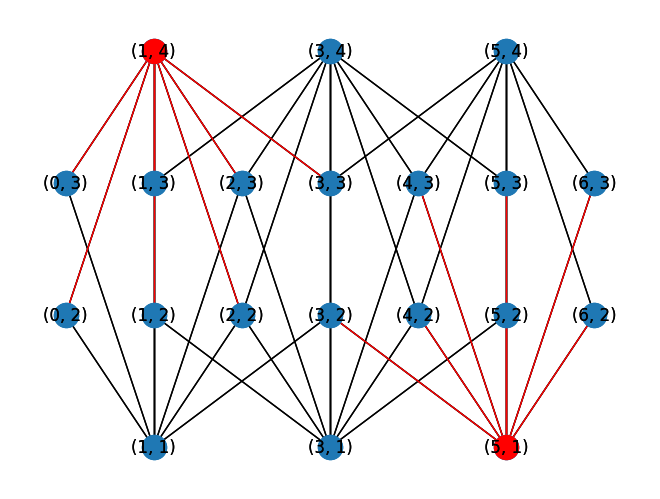

In [7]:
m = Model(name='BMW') #compare result log complexity graph generator function that compare quality of the result evaluating resumt (numbre of nodes & number of qubit)
#ten node how to compare how many qubit needs for alll approach and bard thing??? 3 items and x number qubit need quality of nulmber of acticvate node 
#do the pubo on simulating annnealing threatten sa function can be re-use 
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x') #integer dictionary ??? 
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'

#max_deg = max(G.degree(v) for v in G.nodes())
#y = m.integer_var_dict(points3, lb=0, ub=max_deg, name='y') 
y = [m.binary_var_dict(G.degree(node), name='z_'+str(node)) for node in points3]

#constraint on number of activate edge
for node in points3:
    m.add_constraint(sum(y[G.degree(node)].values()) >= 1)
    m.add_constraint(sum(y[G.degree(node)].values()) <= G.degree(node))
    print("y[G.degree(node).value]  ==  ",y[G.degree(node)].values())

#constraint link active edge and node 
for node in points3:
    m.add_constraint(sum(y[G.degree(node)].values()) == sum(x[v] for v in G.neighbors(node)))

#print(m.prettyprint())

output = m.pprint_as_string()
values = re.findall(r'\[(.*?)\]', output)
valueT = 0
for value in values:
    #print(value)
    valueT = int(value)+valueT
tabR.append(valueT)
m.export_as_lp(basename="BMW3", path=os.path.abspath(""))
sol_model = m.solve()
m.print_solution()
S = []
for (x, y) in sol_model.iter_var_values():
  sx = str(x)
  if sx[0] == 'x':
    S.append((int(sx[2]), int(sx[4])))
showGraph(S)
# dvar bool x[6];
# dvar bool z_(0, 2)[2];
# dvar bool z_(0, 3)[2];
# dvar bool z_(1, 2)[3];
# dvar bool z_(1, 3)[3];
# dvar bool z_(2, 2)[4];
# dvar bool z_(2, 3)[4];
# dvar bool z_(3, 2)[4];
# dvar bool z_(3, 3)[4];
# dvar bool z_(4, 2)[4];
# dvar bool z_(4, 3)[4];
# dvar bool z_(5, 2)[3];
# dvar bool z_(5, 3)[3];
# dvar bool z_(6, 2)[2];
# dvar bool z_(6, 3)[2];
#44 z

[50, 40, 150]
objective: 6
status: OPTIMAL_SOLUTION(2)
  "x_5_1"=1
  "x_1_4"=1
  "z_(1, 2)_0"=1
  "z_(1, 3)_0"=1
  "z_(2, 2)_0"=1


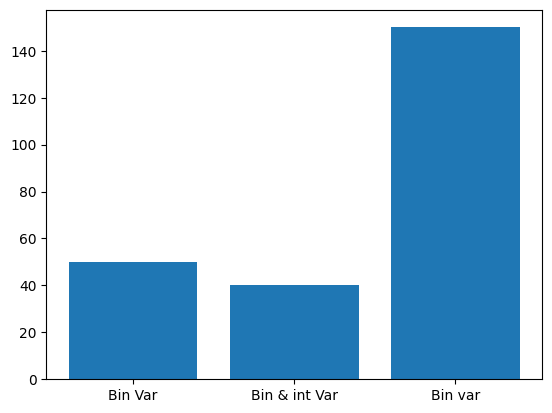

In [8]:
sol_model = m.solve()
print(tabR)
m.print_solution()
import matplotlib.pyplot as plt
import numpy as np
x = np.array(["Bin Var", "Bin & int Var", "Bin var"])
y = np.array(tabR)

plt.bar(x,y)
plt.show()

In [9]:
quadratic_program1 = QuadraticProgram()
quadratic_program2 = QuadraticProgram()
quadratic_program3 = QuadraticProgram()
quadratic_program1.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW1.lp'))
quadratic_program2.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW2.lp'))
quadratic_program3.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW3.lp'))
print(quadratic_program1.prettyprint())
#print(len(quadratic_program1.linear_constraints_index))
#50 binary variables from the first program
#14 integer variables and 6 binary variable from the second program
#16 binary variables from the third program

Problem name: BMW

Minimize
  x_1_1 + x_1_4 + x_3_1 + x_3_4 + x_5_1 + x_5_4

Subject to
  Linear constraints (34)
    y_(1,_1)_(0,_2) + y_(1,_4)_(0,_2) <= 2  'c1'
    y_(1,_1)_(0,_2) + y_(1,_4)_(0,_2) >= 1  'c2'
    y_(1,_1)_(0,_3) + y_(1,_4)_(0,_3) <= 2  'c3'
    y_(1,_1)_(0,_3) + y_(1,_4)_(0,_3) >= 1  'c4'
    y_(1,_1)_(1,_2) + y_(1,_4)_(1,_2) + y_(3,_1)_(1,_2) <= 3  'c5'
    y_(1,_1)_(1,_2) + y_(1,_4)_(1,_2) + y_(3,_1)_(1,_2) >= 1  'c6'
    y_(1,_1)_(1,_3) + y_(1,_4)_(1,_3) + y_(3,_4)_(1,_3) <= 3  'c7'
    y_(1,_1)_(1,_3) + y_(1,_4)_(1,_3) + y_(3,_4)_(1,_3) >= 1  'c8'
    y_(1,_1)_(2,_2) + y_(1,_4)_(2,_2) + y_(3,_1)_(2,_2) + y_(3,_4)_(2,_2)
    <= 4  'c9'
    y_(1,_1)_(2,_2) + y_(1,_4)_(2,_2) + y_(3,_1)_(2,_2) + y_(3,_4)_(2,_2)
    >= 1  'c10'
    y_(1,_1)_(2,_3) + y_(1,_4)_(2,_3) + y_(3,_1)_(2,_3) + y_(3,_4)_(2,_3)
    <= 4  'c11'
    y_(1,_1)_(2,_3) + y_(1,_4)_(2,_3) + y_(3,_1)_(2,_3) + y_(3,_4)_(2,_3)
    >= 1  'c12'
    y_(1,_1)_(3,_2) + y_(3,_1)_(3,_2) + y_(3,_4)_(3,_2) + y_(5,

minimize 19*c10@int_slack@0^2 + 76*c10@int_slack@0*c10@int_slack@1 + 38*c10@int_slack@0*c10@int_slack@2 + 76*c10@int_slack@1^2 + 76*c10@int_slack@1*c10@int_slack@2 + 19*c10@int_slack@2^2 + 19*c11@int_slack@0^2 + 76*c11@int_slack@0*c11@int_slack@1 + 76*c11@int_slack@1^2 + 19*c12@int_slack@0^2 + 76*c12@int_slack@0*c12@int_slack@1 + 38*c12@int_slack@0*c12@int_slack@2 + 76*c12@int_slack@1^2 + 76*c12@int_slack@1*c12@int_slack@2 + 19*c12@int_slack@2^2 + 19*c13@int_slack@0^2 + 76*c13@int_slack@0*c13@int_slack@1 + 76*c13@int_slack@1^2 + 19*c14@int_slack@0^2 + 76*c14@int_slack@0*c14@int_slack@1 + 38*c14@int_slack@0*c14@int_slack@2 + 76*c14@int_slack@1^2 + 76*c14@int_slack@1*c14@int_slack@2 + 19*c14@int_slack@2^2 + 19*c15@int_slack@0^2 + 76*c15@int_slack@0*c15@int_slack@1 + 76*c15@int_slack@1^2 + 19*c16@int_slack@0^2 + 76*c16@int_slack@0*c16@int_slack@1 + 38*c16@int_slack@0*c16@int_slack@2 + 76*c16@int_slack@1^2 + 76*c16@int_slack@1*c16@int_slack@2 + 19*c16@int_slack@2^2 + 19*c17@int_slack@0^2 +

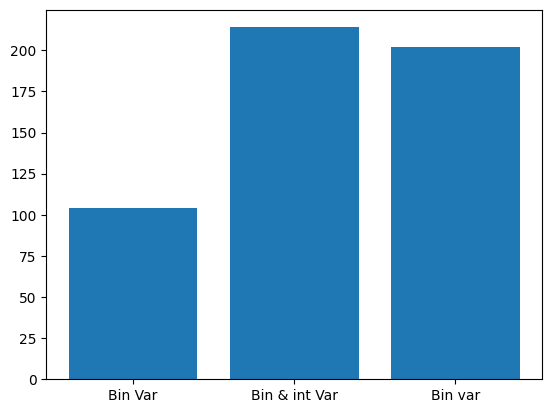

In [10]:
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.problems import VarType

conv = QuadraticProgramToQubo()
qp1 = conv.convert(quadratic_program1)
qp2 = conv.convert(quadratic_program2)
qp3 = conv.convert(quadratic_program3)
print(qp3)
bin_num = []
bin_vars1 = []
for var in qp1.variables:
    if var.vartype is VarType.BINARY:
        bin_vars1.append(var.name)
bin_num.append(len(bin_vars1))
bin_vars2 = []
for var in qp2.variables:
    if var.vartype is VarType.BINARY:
        bin_vars2.append(var.name)
bin_num.append(len(bin_vars2))
bin_vars3 = []
for var in qp3.variables:
    if var.vartype is VarType.BINARY:
        bin_vars3.append(var.name)
bin_num.append(len(bin_vars3))
x = np.array(["Bin Var", "Bin & int Var", "Bin var"])
y = np.array(bin_num)

plt.bar(x,y)
plt.show()

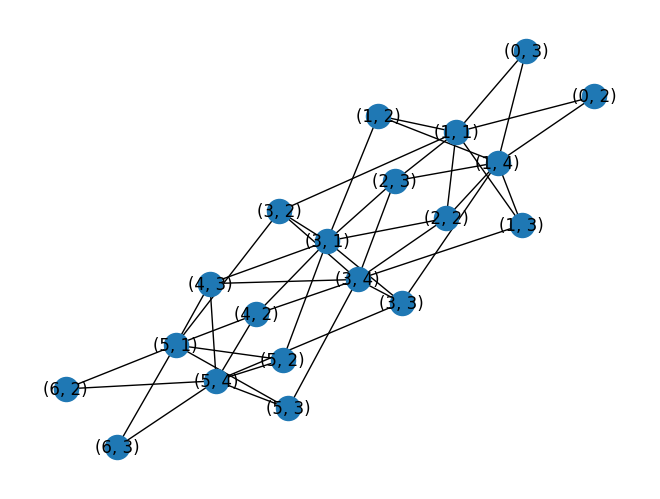

In [11]:
import random

# simple max cut cost function

#f = lambda x: - (G.number_of_edges() - sum([(2*x[i]-1)*(2*x[j]-1) for (i,j) in G.edges()]))/2 # defined such that f yields -1 * the number of actual cuts (for debugging simplicity)
nodes = random.randint(3,6)
probability = 0.8
G1 = nx.gnp_random_graph(nodes,probability)
#n = G1.number_of_nodes()
n = len(points3)
def energyF(x):
    somme = 0
    for node in points3:
        prod = (np.product(1 - x[v] for v in G.neighbors(node)))==0
        somme += prod
    return somme
    #return  - (G1.number_of_edges() - sum([(2*x[i]-1)*(2*x[j]-1) for (i,j) in G1.edges()]))/2
f = lambda x: energyF(x)
pos = {node: node for node in G.nodes()}
nx.draw(G, with_labels=True)

In [12]:
from typing import List, Union, Callable  # for type hints

import numpy as np
import random
from time import time
import math


def sa_solve(
    f: Callable,
    n: int,
    n_iter: int = 1,
    n_temp_iter: int = 1000,
    temp: float = 20,
    warm_start: Union[List, np.ndarray] = None,
) -> (List, List, float):
    """
    Standard simulated annealing solver

    :param f: cost function
    :param n: problem instance size (i.e., length of solution bitstring)
    :param n_iter: number of runs
    :param n_temp_iter: number of mutations
    :param temp: starting temperature
    :param warm_start: warm start solution vector
    :return: solution with samples, energies and times
    """
    samples = []
    energies = []
    indices = list(range(0, n))

    # keep track of wallclock time
    start_time = time()

    for _ in range(n_iter):
        # define start vector
        if warm_start is None:
            x = np.array([0] * n) #start with the full graph
        else:
            x = np.array(warm_start)

        # evaluate start vectorx
        curr, curr_eval = x, f(x)
        best, best_eval = curr, curr_eval

        for i in range(n_temp_iter):
            # flip a random bit to generate a neighbor
            candidate = np.copy(curr)
            flip_pos = random.sample(indices, 1)

            candidate[flip_pos] = int(not candidate[flip_pos])

            # evaluate new vector
            candidate_eval = f(candidate)

            # keep best vector
            if candidate_eval <= best_eval:
                best, best_eval = candidate, candidate_eval

            # update temperature according to Metropolis–Hastings algorithm
            diff = candidate_eval - curr_eval
            t = temp / float(i + 1)

            metropolis_eval = math.exp(-diff / t)

            # base new mutations on new vector
            if diff <= 0 or random.random() < metropolis_eval:
                curr, curr_eval = candidate, candidate_eval

        samples.append(best.tolist())
        energies.append(best_eval)

    runtime = time() - start_time
    
    return samples, energies, runtime

0.3974893093109131
[([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], 0)]
['blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red']


ValueError: 'c' argument has 56 elements, which is inconsistent with 'x' and 'y' with size 20.

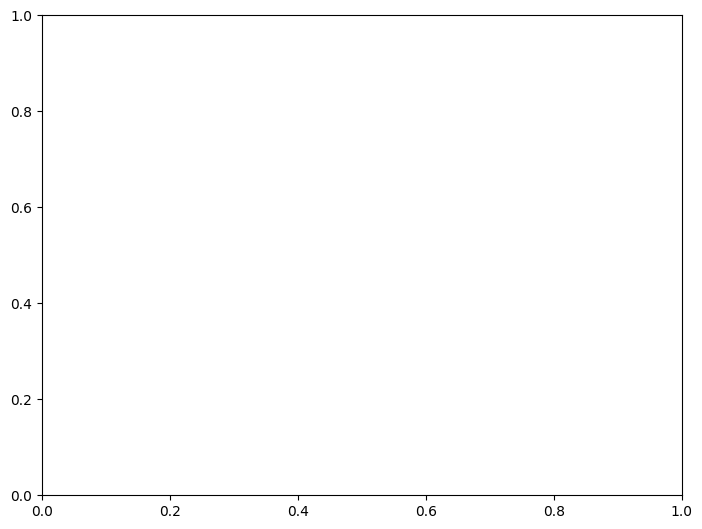

In [13]:
samples, energies, runtime = sa_solve(f, n)
print(runtime)
print(list(zip(samples, energies)))
#samples
color_map = ['blue' if samples[0][i] else 'red' for i in range(len(samples[0]))]
print(color_map)
pos = {node: node for node in G.nodes()}
nx.draw(G,pos, node_color=color_map, with_labels=True)

In [ ]:
from collections import defaultdict
import neal
#QUBO#
A=1
B=1
Q = defaultdict(int)

#constraints favorisate every edge activation
for node in points3:
  for anode in G.neighbors(node):
    Q[(node, anode)] -= 1/G.degree(anode)*B
    #minimisation function
    Q[(anode, anode)] += 1*A

#bqm = Model.to_bqm(feed_dict=Q)
#sa = neal.SimulatedAnnealingSampler()
#sampleset = sa.sample(bqm)